In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load daily data
daily_data = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter01/data/day.csv")
# load hourly data
hourly_data = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter01/data/hour.csv")

In [3]:
# print some generic statistics about the data
print(f"Shape of the data: {hourly_data.shape}")
print(f"Number of missing values in the data: {hourly_data.isnull().sum().sum()}")

Shape of the data: (17379, 17)
Number of missing values in the data: 0


In [4]:
hourly_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
daily_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# get statistics on the numerical columns
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


## **Data Preprocessing** ##

**Preprocessing Temporal and Weather Features**

In [7]:
# create a copy of the original data
preprocessed_data = hourly_data.copy()

In [8]:
# transform seasons
seasons_mapping = {1: "winter", 2: "spring", 3: "summer", 4: "fall"}
preprocessed_data["season"] = preprocessed_data["season"].apply(lambda x : seasons_mapping[x])

In [9]:
# transform yr
year_mapping = {0:2011, 1:2012}
preprocessed_data["yr"] = preprocessed_data["yr"].apply(lambda x : year_mapping[x])

In [10]:
# transform weekday
weekday_mapping = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
preprocessed_data["weekday"] = preprocessed_data["weekday"].apply(lambda x : weekday_mapping[x])

In [11]:
# transform weathersit
weather_mapping = {1: "clear", 2: "cloudy", 3: "light_rain_snow", 4: "heavy_rain_snow"}
preprocessed_data["weathersit"] = preprocessed_data["weathersit"].apply(lambda x : weather_mapping[x])

***
- ##### The hum column stands for the current normalized air humidity, with values from 0 to 1 (hence, we will multiply the values of this column by 100, in order to obtain percentages). ##### 
-  ##### Finally, the windspeed column represents the windspeed, which is again normalized to values between 0 and 67 m/s. #####
***

In [12]:
preprocessed_data["hum"] = preprocessed_data["hum"]*100
preprocessed_data["windspeed"] = preprocessed_data["windspeed"]*67

In [13]:
 #view sample data
 cols = ["season", "yr", "weekday", "weathersit", "hum", "windspeed"]
 preprocessed_data[cols].sample(10, random_state = 123)

,season,yr,weekday,weathersit,hum,windspeed
5792,summer,2011,Saturday,clear,74.0,8.9981
7823,fall,2011,Sunday,clear,43.0,31.0009
15426,fall,2012,Tuesday,cloudy,77.0,6.0032
15028,fall,2012,Sunday,clear,51.0,22.0028
12290,spring,2012,Friday,cloudy,89.0,12.9980
3262,spring,2011,Friday,clear,64.0,7.0015
10763,spring,2012,Thursday,clear,42.0,23.9994
12384,spring,2012,Tuesday,light_rain_snow,82.0,11.0014
6051,summer,2011,Wednesday,clear,52.0,19.0012
948,winter,2011,Saturday,clear,80.0,0.0000


**Registered versus Casual Use Analysis**

In [14]:
"""
assert that total number of rides is equal to the sum of registered and
casual ones
"""
assert (preprocessed_data.casual + preprocessed_data.registered == preprocessed_data.cnt).all(),\
        "Sum of casual and registered rides not equals to total number of rides"

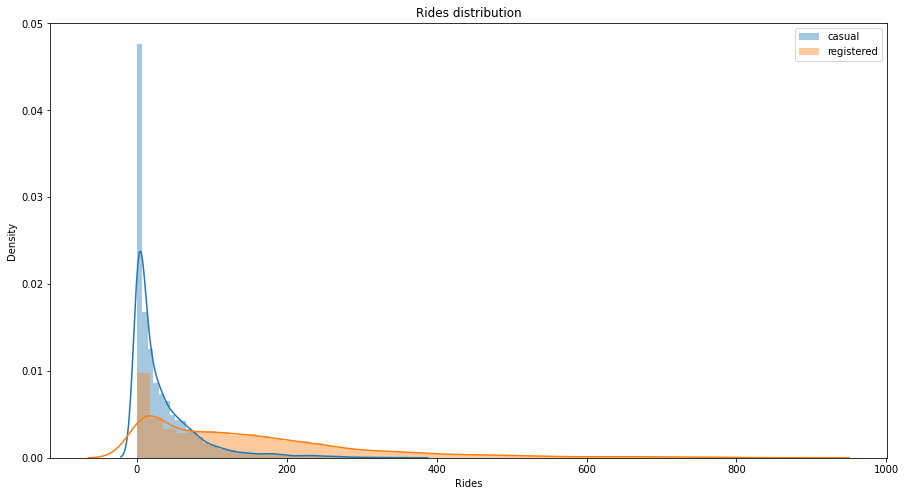

In [15]:
# plot distributions of registered vs casual rides
plt.figure(figsize=(15,8))
sns.distplot(preprocessed_data["casual"], label="casual")
sns.distplot(preprocessed_data["registered"], label="registered")
plt.title("Rides distribution")
plt.xlabel("Rides")
plt.legend();

***
From the Figure, we can easily see that registered users perform way more rides than casual ones. Furthermore, we can see that the two distributions are skewed to the right, meaning that, for most of the entries in the data, zero or a small number of rides were registered (most probably due to overnight rides, but we have to confirm later).
***


Text(0, 0.5, 'number of rides per day')

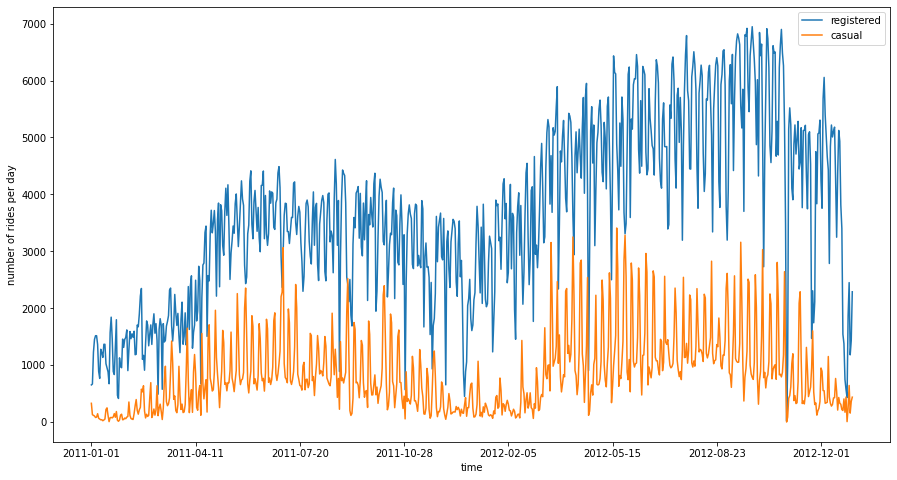

In [16]:
# plot evolution of rides over time
plot_data = preprocessed_data[["registered", "casual", "dteday"]]
ax = plot_data.groupby("dteday").sum().plot(figsize = (15,8))
ax.set_xlabel("time")
ax.set_ylabel("number of rides per day")

***
As you can see from the preceding figure, the number of registered rides is always above and significantly higher than the number of casual rides per day. Furthermore, we can observe that during winter, the overall number of rides decreases (which is totally in line with our expectations, as bad weather and low temperatures have a negative impact on ride sharing services)
***


***
Note that there is quite a lot of variance in the time series of the rides in Figure. One way to smooth out the curves is to take the rolling mean and standard deviation of the two time series and plot those instead. In this way, we can visualize not only the average number of rides for a specific time period (also known as a window) but also the expected deviation from the mean
***

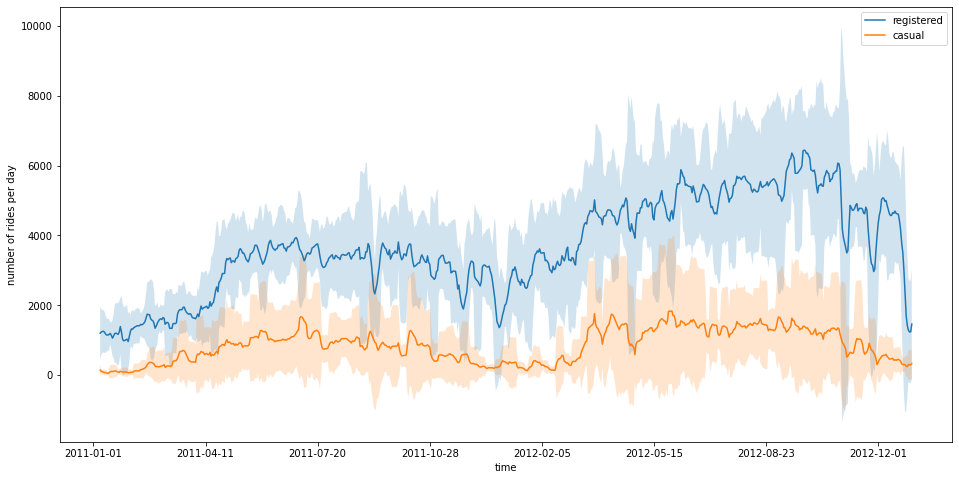

In [17]:
"""
Create new dataframe with necessary for plotting columns, and obtain
number of rides per day, by grouping over each day
"""
plot_data = preprocessed_data[["registered", "casual", "dteday"]]
plot_data = plot_data.groupby("dteday").sum()

# define window for computing the rolling mean and standard deviation (7 days)
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()
"""
Create a plot of the series, where we first plot the series of rolling (moving) means, then we color the zone between the series of rolling means +- 2
rolling standard deviations
"""
ax = rolling_means.plot(figsize = (16,8))
ax.fill_between(rolling_means.index,\
                rolling_means["registered"] + 2*rolling_deviations["registered"],\
                rolling_means["registered"] - 2*rolling_deviations["registered"],\
                alpha = 0.2)
ax.fill_between(rolling_means.index,\
                rolling_means["casual"] + 2*rolling_deviations["casual"],\
                rolling_means["casual"] - 2*rolling_deviations["casual"],\
                alpha = 0.2)
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");

***
Let us now focus on the distributions of the requests over separate hours and days of the week. We would expect certain time patterns to arise, as bike requests should be more frequent during certain hours of the day, depending on the day of the week.
***

In [18]:
plot_data = preprocessed_data[["hr", "weekday", "registered", "casual"]]
plot_data = plot_data.melt(id_vars=["hr", "weekday"], var_name="type", value_name="count")

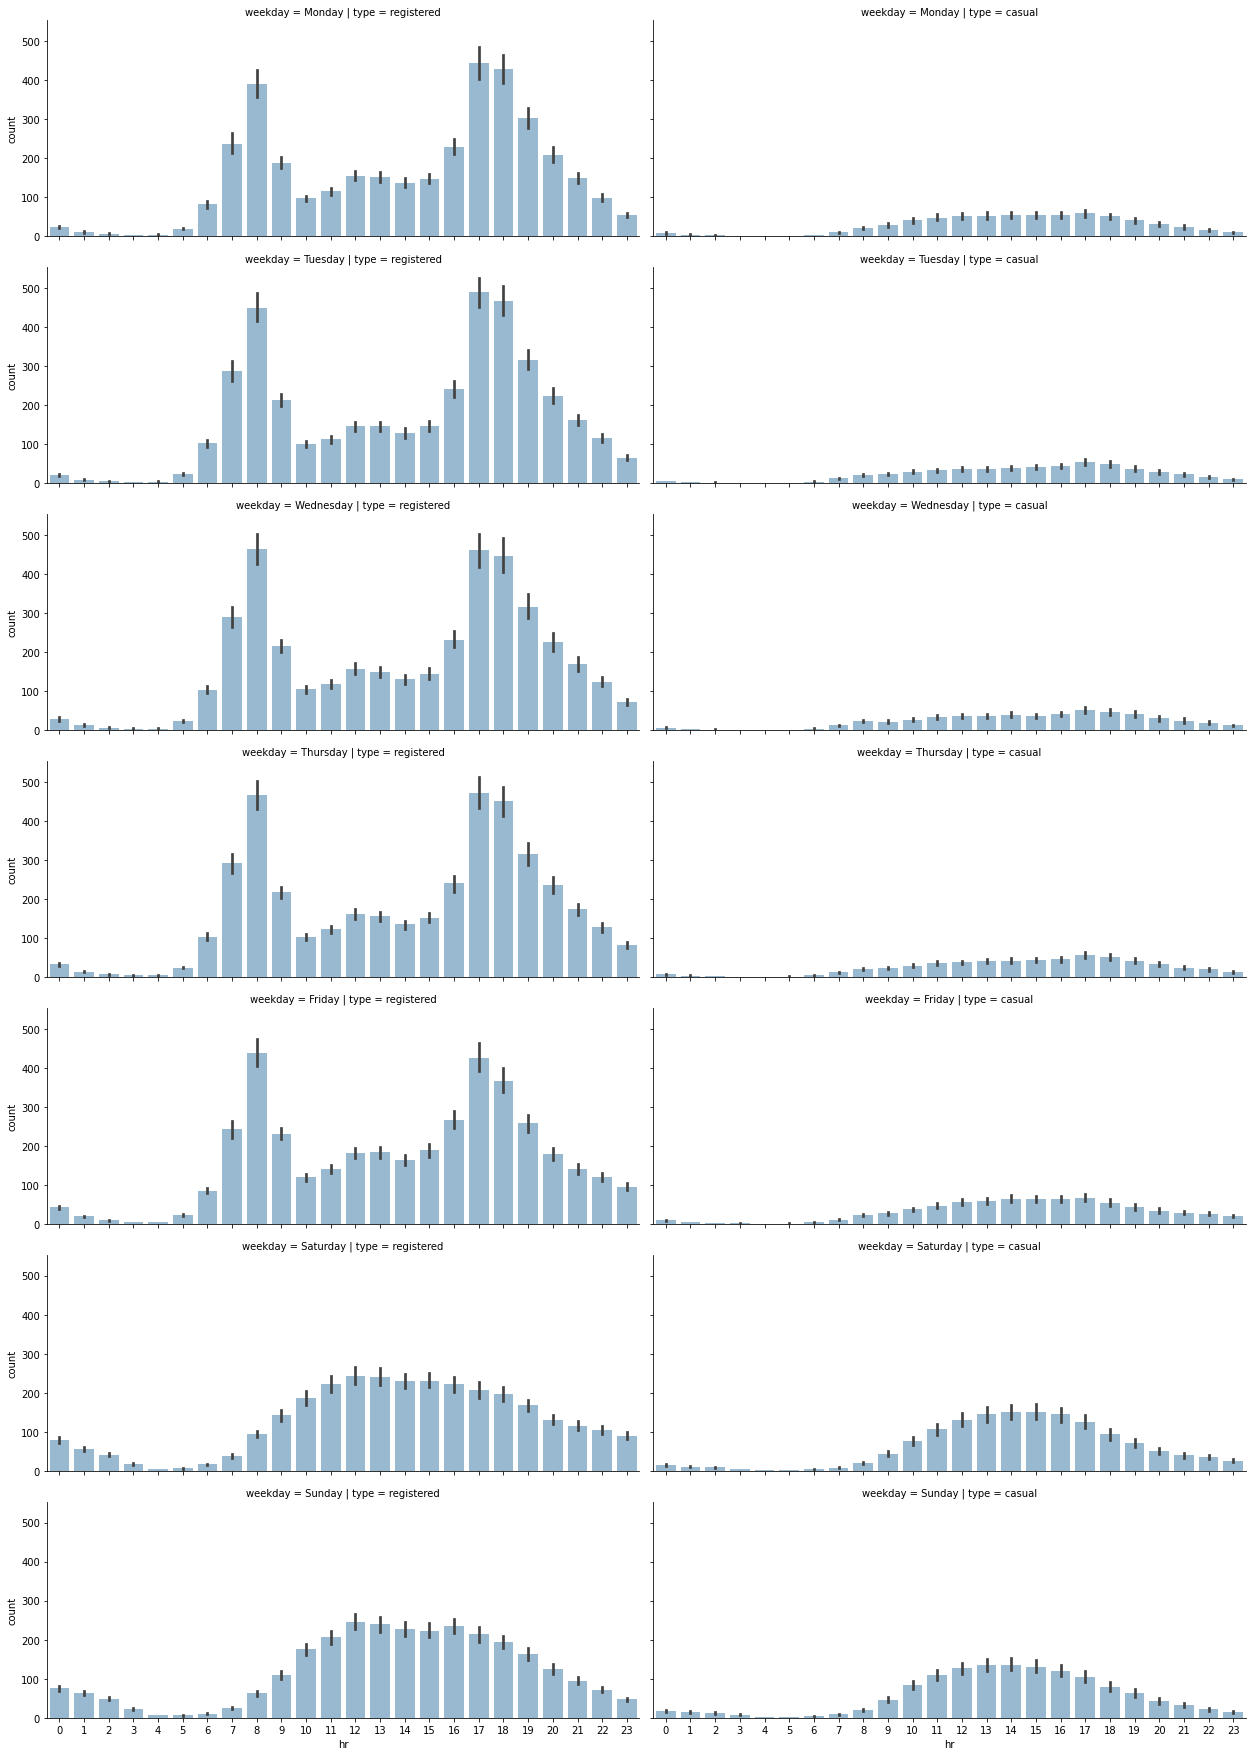

In [19]:
"""
create FacetGrid object, in which a grid plot is produced. As columns, we have the various days of the week,as rows, the different types 
(registered and casual)
"""
grid = sns.FacetGrid(plot_data, row = "weekday", col = "type",height = 3.5, aspect = 2.5,\
                     row_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
# populate the FacetGrid with the specific plots
grid.map(sns.barplot,"hr", "count", alpha = 0.5);

***
We can immediately note that on working days, the highest number of rides for registered users takes place around 8 AM and at 6 PM. This is totally in line with our expectations, as it is likely that most registered users use the bike sharing service for commuting. On the other hand, the casual usage of bike sharing services on working days is quite limited, as the plot shows.
***

***
During the weekend, we can see that ride distributions change for both casual and registered users. Still, registered rides are more frequent than casual ones, but both the distributions have the same shape, almost uniformly distributed between the time interval of 11 AM to 6 PM. As a conclusion, we could claim that most of the usage of bike sharing services occurs during working days, right before and right after the standard working time (9 to 5)
***

**Analyzing Seasonal Impact on Rides**

In [20]:
# select subset of the data
plot_data = preprocessed_data[["hr", "season", "registered", "casual"]]

# unpivot data from wide to long format
plot_data = plot_data.melt(id_vars = ["hr", "season"], var_name="type", value_name = "count")

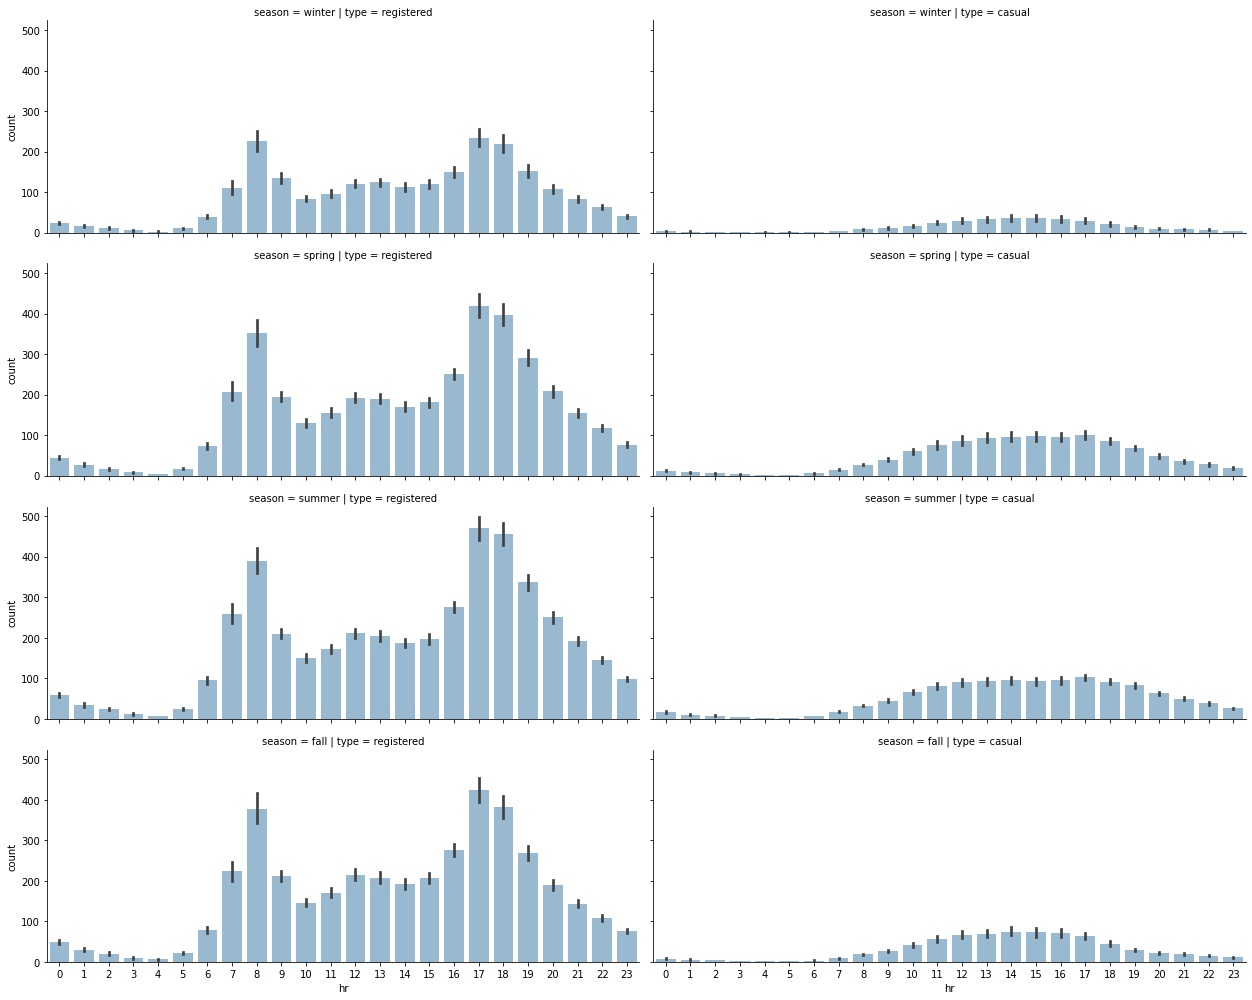

In [21]:
# define FacetGrid
grid = sns.FacetGrid(plot_data, row = "season", col = "type", height = 3.5, aspect = 2.5,\
                     row_order = ["winter", "spring", "summer", "fall"])
grid.map(sns.barplot, "hr", "count", alpha = 0.5);

***
As can be seen in the plot, while each season has a similar graph shape, the
count is lower for the winter graph. So there are fewer rides (registered and
casual) during winter. This makes sense, as fewer rides are likely to occur when
the weather conditions are poor.
***

In [22]:
# the distribution of rides on a weekday basis
plot_data = preprocessed_data[["weekday", "season", "registered", "casual"]]
plot_data = plot_data.melt(id_vars=["weekday", "season"], var_name="type", value_name= "count")

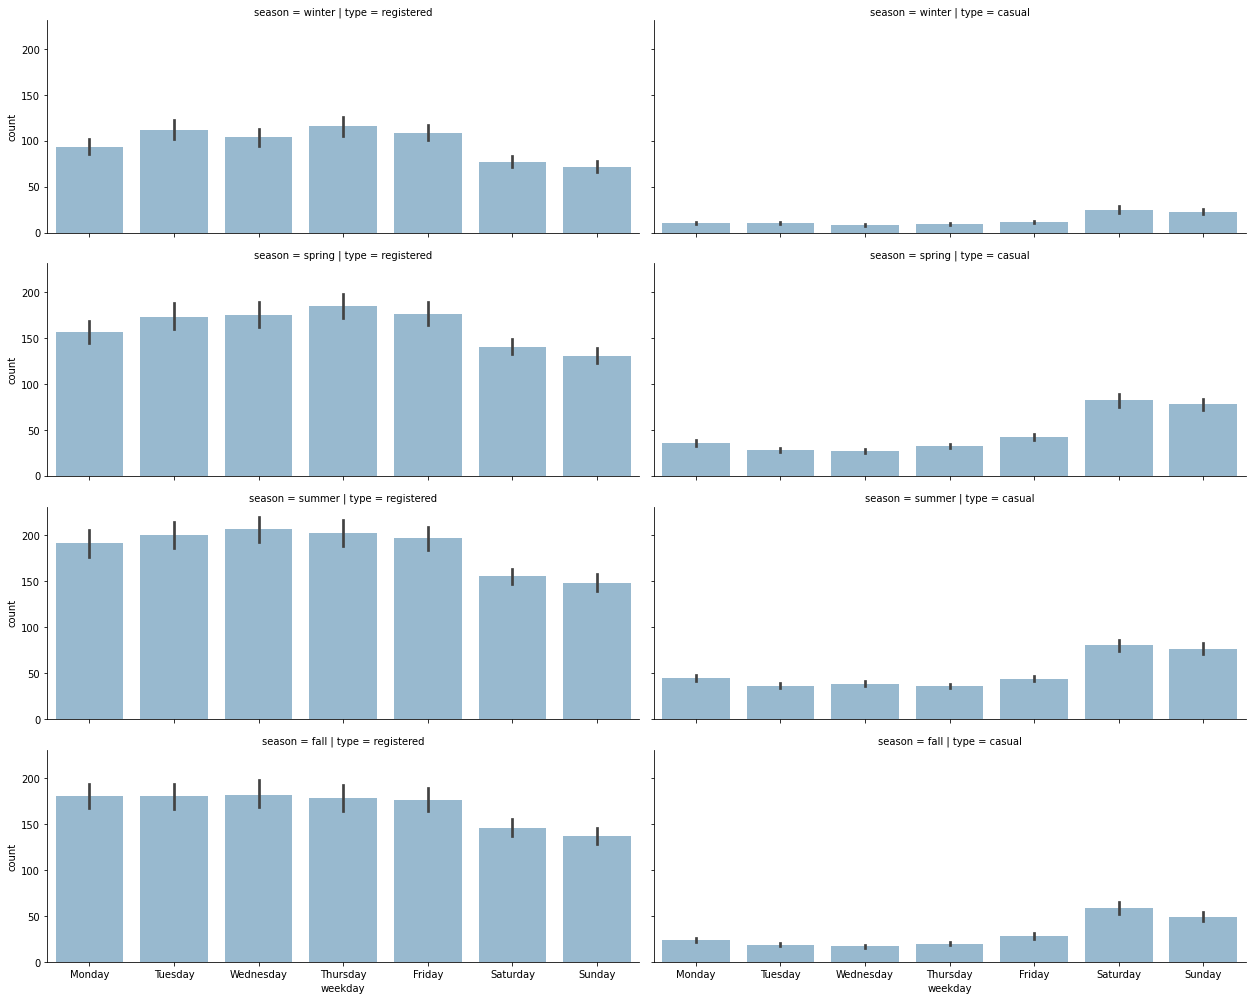

In [23]:
grid = sns.FacetGrid(plot_data, row='season', col='type', height=3.5, aspect=2.5, row_order=['winter', 'spring','summer', 'fall'])
grid.map(sns.barplot, "weekday", "count", alpha = 0.5, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']);

***
There is a decreasing number of registered rides over the weekend (compared to the rest of the week), while the number of casual rides increases. This could enforce our initial hypothesis, that is, that registered customers mostly use the bike sharing service for commuting (which could be the reason for the
decreasing number of registered rides over the weekend), while casual customers
use the service occasionally over the weekend. Of course, such a conclusion cannot be based solely on plot observations but has to be backed by statistical tests.
***

**Hypothesis Tests**

In [24]:
# Estimating Average Registered Rides
population_mean = preprocessed_data.registered.mean()
population_mean

153.78686920996606

In [25]:
# register all the rides during the summer of 2011 (this is going to be your sample)
condition = (preprocessed_data.season == "summer") & (preprocessed_data.yr == 2011)
sample = preprocessed_data[condition].registered

***
Specify the significance level. A standard value is 0.05 (that is, when performing the statistical test), if the p-value obtained by the statistical test is less than 0.05, you can reject the null hypothesis by at least 95%.
***

In [26]:
# perform t-test and compute p-value
from scipy.stats import ttest_1samp
test_result = ttest_1samp(sample, population_mean)
print(f"Test statistics: {test_result[0]}, p-value: {test_result[1]}") 

Test statistics: -3.491969148378619, p-value: 0.0004887645279519517


***
The result of the previous test returns a p-value smaller than 0.001, which is less than the predefined critical value. Therefore, you can reject the null hypothesis and assume that the alternative hypothesis is correct.
***

In [27]:
# perform the test again, but this time taking as a sample 5% of the registered rides (selected randomly).
# get sample as 5% of the full data
import random
random.seed(111)
sample_unbiased = preprocessed_data.registered.sample(frac = 0.05)
test_result_unbiased = ttest_1samp(sample_unbiased, population_mean)
print(f"Test statistics: {test_result_unbiased[0]}, p-value: {test_result_unbiased[1]}")

Test statistics: -0.4110173365442922, p-value: 0.6811612732397692


***
This time, the computed p-value is equal to 0.74, which is much larger than the critical 0.05, and so, you cannot reject the null hypothesis.
***

***
**Identifying whether there is a statistically significant difference between registered rides during working days and the weekend**

H_0: average registered rides over weekdays-average registered rides over
weekend=0

H_1:average registered rides over weekdays-average registered rides over
weekend != 0
***

In [28]:
# define mask, indicating if the day is weekend or work day
weekend_days = ["Saturday", "Sunday"]
weekend_mask = preprocessed_data.weekday.isin(weekend_days)
workingdays_mask = ~preprocessed_data.weekday.isin(weekend_days)

# select registered rides for the weekend and working days
weekend_data = preprocessed_data.registered[weekend_mask]
workingdays_data = preprocessed_data.registered[workingdays_mask]

In [29]:
# perform ttest
from scipy.stats import ttest_ind
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}")

Statistic value: -16.004, p-value: 0.000


***
The resulting p-value from this test is less than 0.0001, which is far below the
standard critical 0.05 value. As a conclusion, we can reject the null hypothesis
and confirm that our initial observation is correct: that is, there is a statistically significant difference between the number of rides performed during working days and the weekend
***

Text(0.5, 1.0, 'Registered rides distributions')

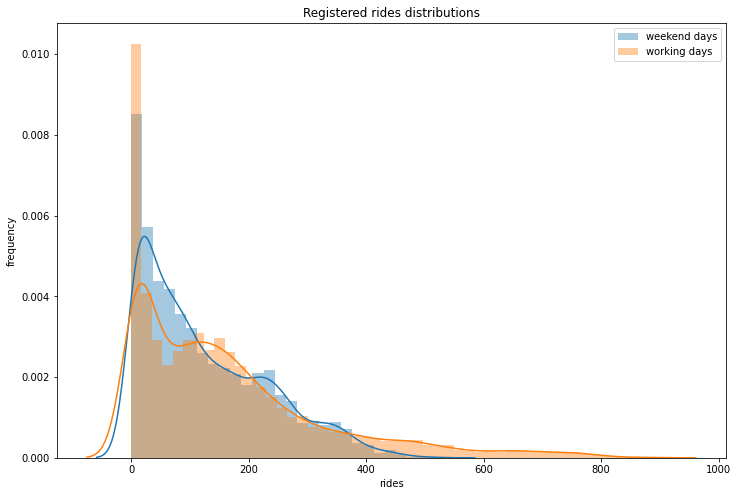

In [30]:
"""
plot distributions of registered rides for working vs weekend days
"""
plt.figure(figsize = (12,8))
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Registered rides distributions")

***
Perform the same type of hypothesis testing to validate the second assumption
from the last section— that is, casual users perform more rides during the weekend. In this case, the null hypothesis is that the average number of rides
during working days is the same as the average number of rides during the weekend, both performed only by casual customers. The alternative hypothesis
will then result in a statistically significant difference in the average number of rides between the two groups
***

Statistic value: 41.077, p-value: 0.000


Text(0.5, 1.0, 'Casual rides distributions')

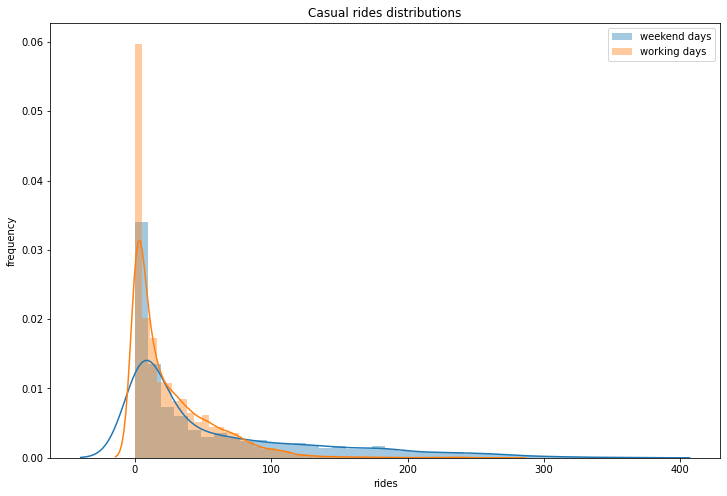

In [31]:
# select casual rides for the weekend and working days
weekend_data = preprocessed_data.casual[weekend_mask]
workingdays_data = preprocessed_data.casual[workingdays_mask]

# perform ttest
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}")


# plot distributions of casual rides for working vs weekend days
plt.figure(figsize = (12,8))
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Casual rides distributions")

***
The p-value returned from the previous code snippet is 0, which is strong
evidence against the null hypothesis. Hence, we can conclude that casual customers also behave differently over the weekend (in this case, they tend to
use the bike sharing service more) as seen in the figure above:
***

**Analysis of Weather-Related Features**

In [32]:
def plot_correlations(data, col):
   # get correlation between col and registered rides
   corr_r = np.corrcoef(data[col], data["registered"])[0,1]
   ax = sns.regplot(x = col, y = "registered", data = data, scatter_kws = {"alpha": 0.05}, label = f"Registered rides (correlation: {corr_r: .3f})")
   
   # get correlation between col and casual rides
   corr_c = np.corrcoef(data[col], data["casual"])[0,1]
   ax = sns.regplot(x = col, y = "casual", data = data, scatter_kws = {"alpha": 0.05}, label = f"Casual rides (correlation: {corr_c: .3f})")

   #adjust legend alpha
   legend = ax.legend()
   for lh in legend.legendHandles:
       lh.set_alpha(0.5)
   ax.set_ylabel("rides")
   ax.set_title(f"Correlation between rides and {col}")
   return ax

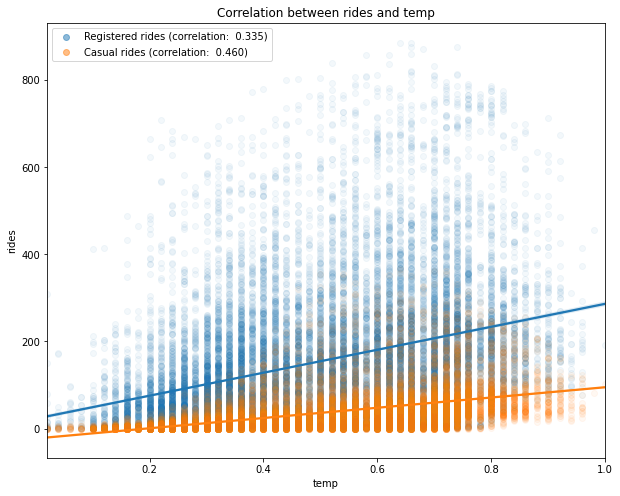

In [33]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'temp')

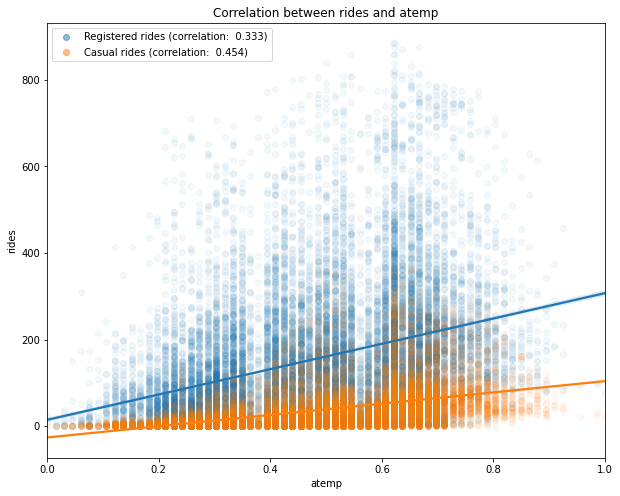

In [34]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'atemp')

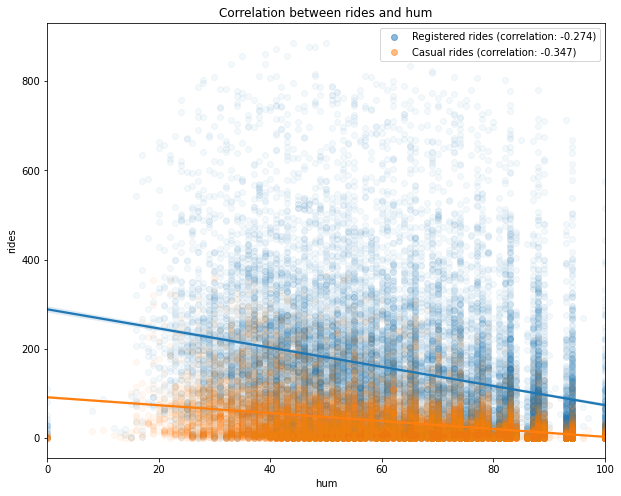

In [35]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'hum')

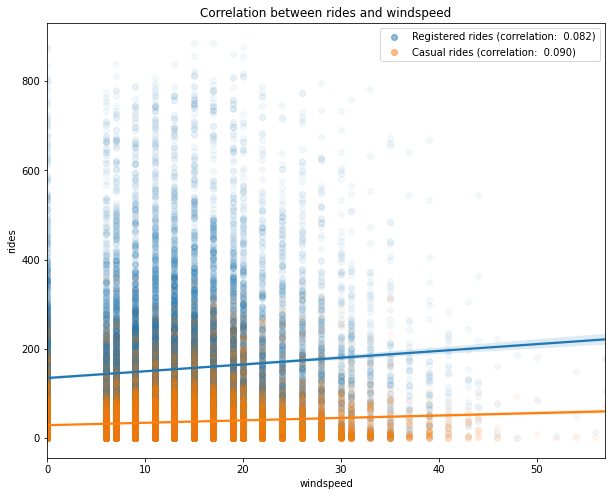

In [36]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'windspeed')

***
We can observe that higher temperatures have a positive impact on the number of rides. **Note that as the values in the registered column are widely spread with respect to the different values in temp, we have a lower correlation compared to the casual column.** Humidity level has a negative correlation with both types of rides. This means that with a high level of humidity (mist or rain), customers will tend not to use the bike sharing service. From last figure, we can see that there is minimal correlation between the number of rides and the wind speed (a weak positive correlation).
***

***
One of the major drawbacks of Pearson's correlation coefficient is its assumption of a linear relationship between the two random variables. This is quite a strong assumption as, most of the time, relationships in nature are not linear. A measure that generalizes the Pearson's correlation to monotonic relationships between two variables is the **Spearman rank correlation**
***

In [37]:
# define random variables
# np.random.randn --> Return a sample (or samples) from the “standard normal” distribution.
x = np.linspace(0,5, 100)
y_lin = 0.5*x + 0.1*np.random.randn(100)
y_mon = np.exp(x) + 0.1*np.random.randn(100)

In [38]:
# compute correlations
from scipy.stats import pearsonr, spearmanr
corr_lin_pearson = pearsonr(x, y_lin)[0]
corr_lin_spearman = spearmanr(x, y_lin)[0]

corr_mon_pearson = pearsonr(x, y_mon)[0]
corr_mon_spearman = spearmanr(x, y_mon)[0]

***
Note that both the **pearsonr()** and **spearmanr()** functions return a
two-dimensional array in which the first value is the respective correlation, while the second one is the p-value of a hypothesis test in which the null hypothesis assumes that the computed correlation is equal to zero. This is quite handy at times, as you not only compute the correlation, but also test its statistical significance against being zero.
***

Text(0.5, 1.0, 'Monotonic relationship\n Pearson: 0.856, Spearman: 1.000')

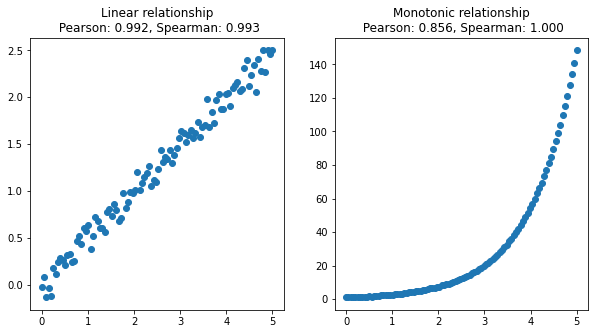

In [39]:
# visualize variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(x, y_lin)
ax1.set_title(f"Linear relationship\n Pearson: {corr_lin_pearson:.3f}, Spearman: {corr_lin_spearman:.3f}")

ax2.scatter(x, y_mon)
ax2.set_title(f"Monotonic relationship\n Pearson: {corr_mon_pearson:.3f}, Spearman: {corr_mon_spearman:.3f}")

***
When the relationship between the two variables is linear (left figure), the two correlation are very similar. In the monotonic relationship (right figure), the linear assumption of the Pearson correlation fails, and, although the correlation coefficient is still quite high (0.856), it is not capable of capturing the perfect relationship between the two variables. On the other hand, the Spearman correlation coefficient is 1, which means that it succeeds in capturing the almost perfect relationship between the two variables.
***

In [40]:
# define function for computing correlations
def compute_correlations(data, col):
  pearson_reg = pearsonr(data[col], data["registered"])[0]
  pearson_cas = pearsonr(data[col], data["casual"])[0]

  spearman_reg = spearmanr(data[col], data["registered"])[0]
  spearman_cas = spearmanr(data[col], data["casual"])[0]

  return pd.Series({"Pearson (registered)": pearson_reg, "Spearman (registered)": spearman_reg, "Pearson (casual)": pearson_cas, "Spearman (casual)": spearman_cas})
  

In [41]:
# compute correlation measures between different features
cols = ["temp", "atemp", "hum", "windspeed"]
corr_data = pd.DataFrame(index = ["Pearson (registered)", "Spearman (registered)", "Pearson (casual)", "Spearman (casual)"])
for col in cols:
  corr_data[col] = compute_correlations(preprocessed_data, col)
corr_data.T

,Pearson (registered),Spearman (registered),Pearson (casual),Spearman (casual)
temp,0.335361,0.373196,0.459616,0.570989
atemp,0.332559,0.373014,0.454080,0.570419
hum,-0.273933,-0.338480,-0.347028,-0.388213
windspeed,0.082321,0.122936,0.090287,0.122920


***
For most of the variables, the Pearson and Spearman correlation coefficient are close enough (some non-linearity is to be expected). The most striking difference between the two coefficients occurs when comparing the temp (and atemp) and casual columns. More precisely, the Spearman correlation is quite high, meaning that there is significant evidence for a nonlinear, relatively strong and positive relationship.
***

***
An interpretation of this result is that casual customers are far keener on using the bike sharing service when temperatures are higher. We have already seen from our previous analysis that casual customers ride mostly during the weekend, and they do not rely on bike sharing services for commuting to work. This conclusion is again confirmed by the strong relationship with temperature, as opposed to registered customers, whose rides have a weaker correlation with temperature.
***

(5.5, -0.5)

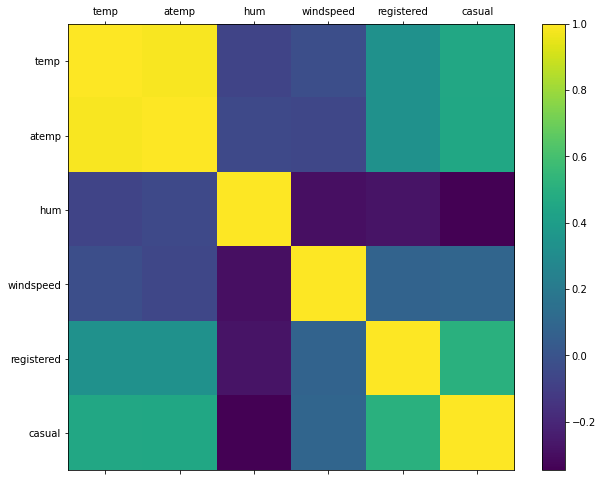

In [42]:
# Correlation Matrix Plot
# plot correlation matrix
cols = ["temp", "atemp", "hum", "windspeed","registered", "casual"]
plot_data = preprocessed_data[cols]
corr = plot_data.corr()
fig = plt.figure(figsize=(10,8))
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(len(plot_data.columns)), plot_data.columns)
plt.yticks(range(len(plot_data.columns)), plot_data.columns)
plt.colorbar()
plt.ylim([5.5, -0.5])

**Time Series Analysis**

In [43]:
"""
define function for plotting rolling statistics and ADF test for time
series
"""
from statsmodels.tsa.stattools import adfuller
def test_stationary(ts, window = 10, **kwargs):
  #create dataframe for plotting
  plot_data = pd.DataFrame(ts)
  plot_data["rolling_mean"] = ts.rolling(window).mean()
  plot_data["rolling_std"] = ts.rolling(window).std()
  #compute p-value of Dickey-Fuller test
  p_val = adfuller(ts)[1]
  ax = plot_data.plot(**kwargs)
  ax.set_title(f"Dickey-Fuller p-value: {p_val:.3f}")

In [44]:
# get daily rides
daily_rides = preprocessed_data[["dteday", "registered","casual"]]
daily_rides = daily_rides.groupby("dteday").sum()
# convert index to DateTime object
daily_rides.index = pd.to_datetime(daily_rides.index)

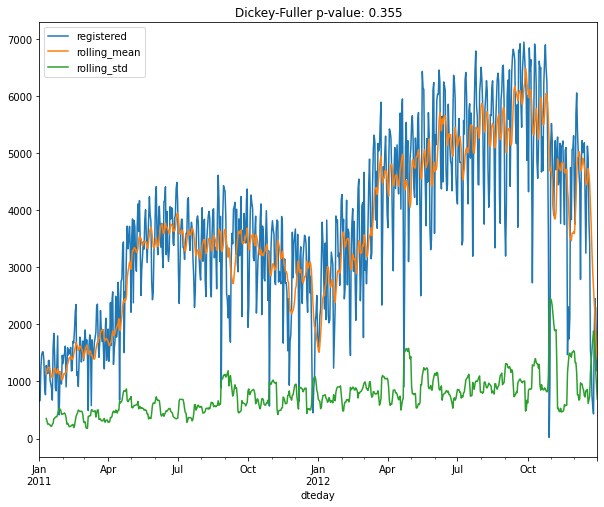

In [45]:
test_stationary(daily_rides["registered"], figsize = (10,8))

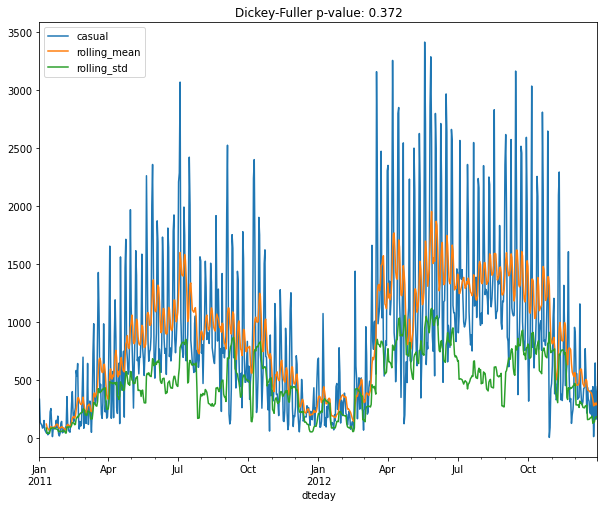

In [46]:
test_stationary(daily_rides["casual"], figsize = (10,8))

***
From the performed tests, we can see that neither the moving average nor standard deviations are stationary. Furthermore, the Dickey-Fuller test returns values of **0.355** and **0.372** for the **registered** and **casual** columns, respectively. This is strong evidence that the time series is not stationary, and we need to process them in order to obtain a stationary one. A common way to detrend a time series and make it stationary is to subtract either its rolling mean or its last value, or to decompose it into a component that will contain its trend, seasonality, and residual components. Let's first check whether the time series is stationary by subtracting their rolling means and last values.
***

In [47]:
# subtract rolling mean
registered = daily_rides["registered"]
registered_ma = registered.rolling(10).mean()
registered_ma_diff = registered - registered_ma
registered_ma_diff.dropna(inplace=True)

casual = daily_rides["casual"]
casual_ma = casual.rolling(10).mean()
casual_ma_diff = casual - casual_ma
casual_ma_diff.dropna(inplace=True)

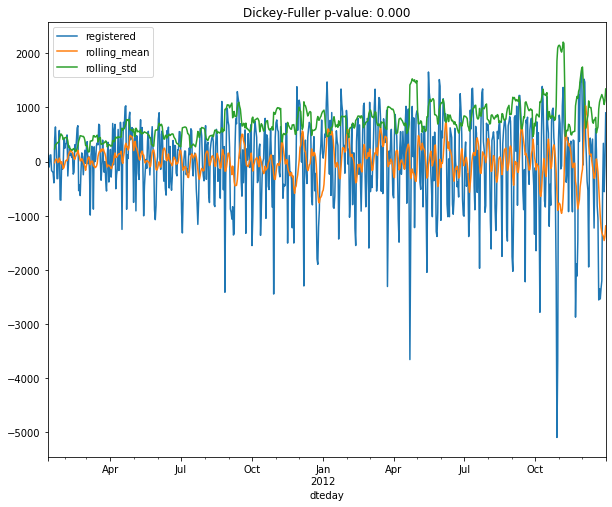

In [48]:
test_stationary(registered_ma_diff, figsize = (10,8))

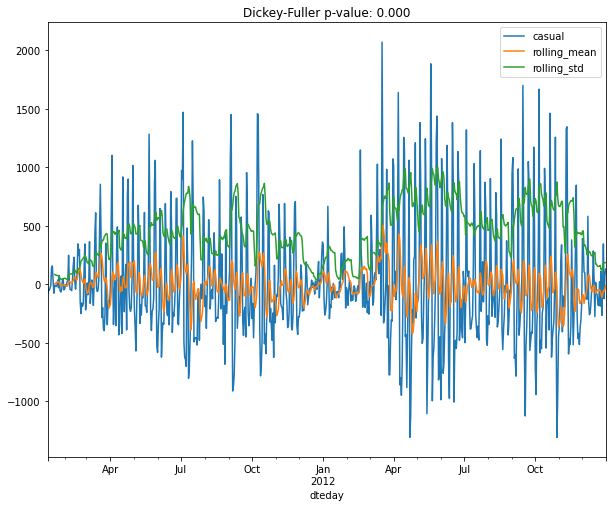

In [49]:
test_stationary(casual_ma_diff, figsize = (10,8))

<Figure size 432x288 with 0 Axes>

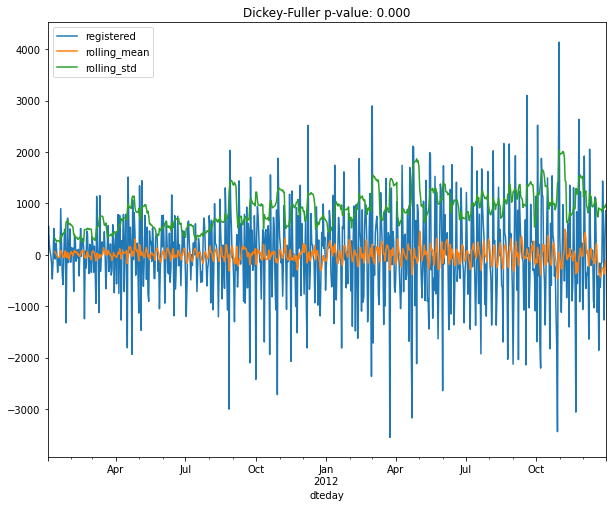

<Figure size 432x288 with 0 Axes>

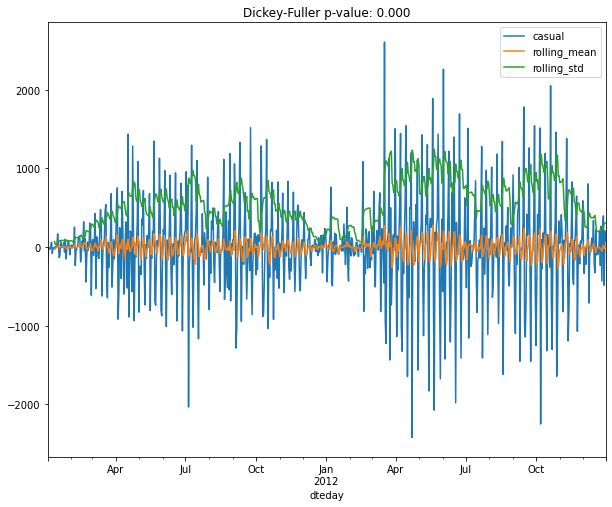

In [50]:
# Subtracting the last value can be done in the same way:
# subtract last value
registered = daily_rides["registered"]
registered_diff = registered - registered.shift()
registered_diff.dropna(inplace=True)

casual = daily_rides["casual"]
casual_diff = casual - casual.shift()
casual_diff.dropna(inplace=True)

plt.figure()
test_stationary(registered_diff, figsize=(10, 8))

plt.figure()
test_stationary(casual_diff, figsize=(10, 8));

***
As you can see, both of the techniques returned a time series, which is stationary, according to the Dickey-Fuller test. Note that an interesting pattern occurs in the casual series: a rolling standard deviation exhibits a clustering effect, that is, periods in which the standard deviation is higher and periods in which it is lower. This effect is quite common in certain fields (finance, for instance) and is known as volatility clustering. A possible interpretation, relative to our data, is that the number of casual rides increases during summer periods and drops during the winter.
***

**Time Series Decomposition in Trend, Seasonality and Residual Components**

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
registered_decomposition = seasonal_decompose(daily_rides["registered"])
casual_decomposition = seasonal_decompose(daily_rides["casual"])

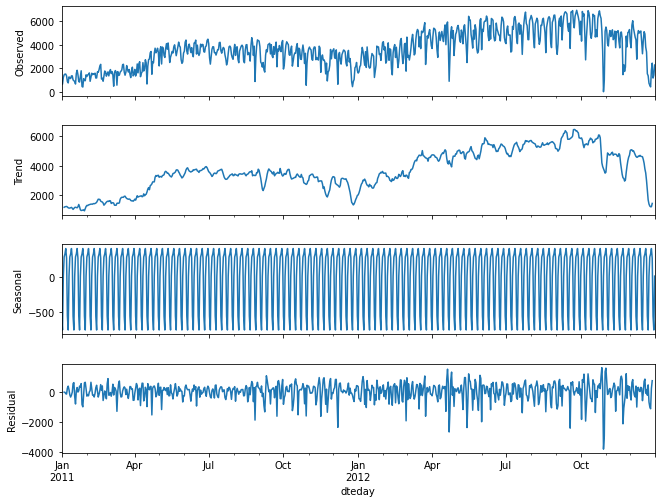

In [52]:
# plot decompositions
registered_plot = registered_decomposition.plot()
registered_plot.set_size_inches(10, 8)

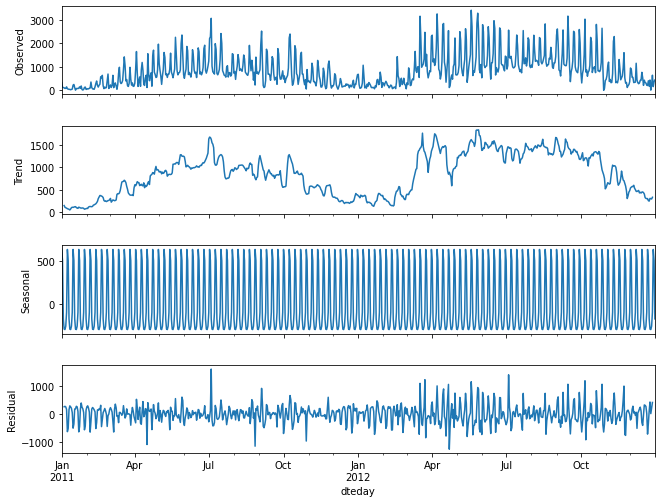

In [53]:
casual_plot = casual_decomposition.plot()
casual_plot.set_size_inches(10, 8)

<Figure size 432x288 with 0 Axes>

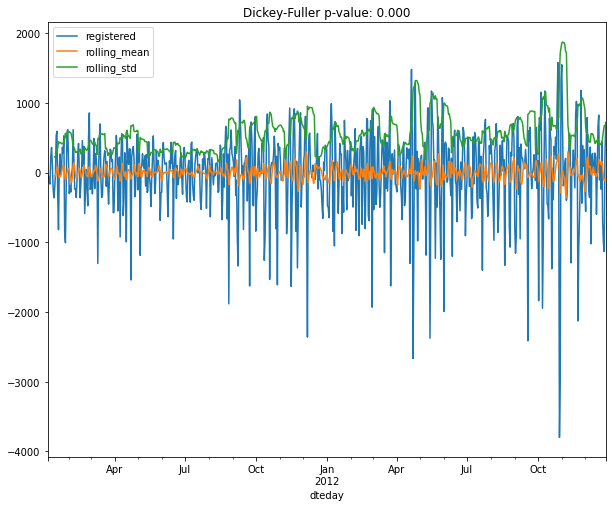

In [54]:
# test residuals for stationarity
plt.figure();
test_stationary(registered_decomposition.resid.dropna(),figsize=(10, 8));

<Figure size 432x288 with 0 Axes>

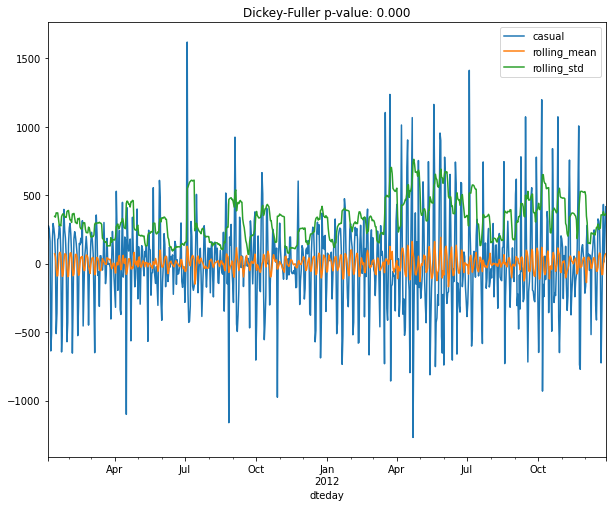

In [55]:
plt.figure()
test_stationary(casual_decomposition.resid.dropna(),figsize=(10, 8))

***
A common approach to modeling a time series is to assume that past observations
somehow influence future ones. For instance, customers who are satisfied by using the bike sharing service will more likely recommend it, producing, in this way, a positive impact on the service and a higher number of customers (obviously, any negative feedback has the opposite effect, reducing the number of customers). Hence, increasing the number of customers and the quality of the service increases the number of recommendations and, therefore, the number of new customers. In this way, a positive feedback loop is created, in which the current number of rides correlates with its past values.
***